Description: Under a current system implemented by a banking company, only a small percentage of customers see recommendations for products causing an unbalanced customer experience. The company would like a more effective recommendation system as to ensure customer satisfication. 

Objective: Given 1.5 years of data from Santander bank, starting from 1/28/2015. The data shows what products customers have each month, like credit cards or savings accounts. The task is to predict what extra products customers will buy by the end of 06/2016, compared to what they had in  05/2016.



In [2]:
#Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc


In [3]:
#Loading it up

file = "train_ver2_500000.csv"
file_2 = "test_ver2.csv.zip"
df = pd.read_csv(file)
df_test = pd.read_csv(file_2)

/var/folders/j6/qffj6d9509bfydvp_5l5_yhm0000gn/T/ipykernel_42693/68301750.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/j6/qffj6d9509bfydvp_5l5_yhm0000gn/T/ipykernel_42693/68301750.py:6: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv(file_2)


In [4]:
#Variable names

VarNames = ["fecha_dato","ncodpers","ind_empleado","pais_residencia","sexo","age","fecha_alta","ind_nuevo","antiguedad","indrel","ult_fec_cli_1t","indrel_1mes","tiprel_1mes","indresi","indext","conyuemp","canal_entrada","indfall","tipodom","cod_prov","nomprov","ind_actividad_cliente","renta","segmento","ind_ahor_fin_ult1","ind_aval_fin_ult1","ind_cco_fin_ult1","ind_cder_fin_ult1","ind_cno_fin_ult1","ind_ctju_fin_ult1","ind_ctma_fin_ult1","ind_ctop_fin_ult1","ind_ctpp_fin_ult1","ind_deco_fin_ult1","ind_deme_fin_ult1","ind_dela_fin_ult1","ind_ecue_fin_ult1","ind_fond_fin_ult1","ind_hip_fin_ult1","ind_plan_fin_ult1","ind_pres_fin_ult1","ind_reca_fin_ult1","ind_tjcr_fin_ult1","ind_valo_fin_ult1","ind_viv_fin_ult1","ind_nomina_ult1","ind_nom_pens_ult1","ind_recibo_ult1"]

In [5]:
#Taking a look at the data

print(df)

        fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  \
0       2015-01-28   1375586            N              ES    H   35   
1       2015-01-28   1050611            N              ES    V   23   
2       2015-01-28   1050612            N              ES    V   23   
3       2015-01-28   1050613            N              ES    H   22   
4       2015-01-28   1050614            N              ES    V   23   
...            ...       ...          ...             ...  ...  ...   
499994  2015-01-28    662262            N              ES    H   40   
499995  2015-01-28    662260            N              ES    V   31   
499996  2015-01-28    662206            N              ES    H   29   
499997  2015-01-28    662210            N              ES    V   52   
499998  2015-01-28    662212            N              ES    V   34   

        fecha_alta  ind_nuevo antiguedad  indrel  ... ind_hip_fin_ult1  \
0       2015-01-12        0.0          6     1.0  ...                0   

In [6]:
##Looking at what type of data contained within this dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499999 entries, 0 to 499998
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             499999 non-null  object 
 1   ncodpers               499999 non-null  int64  
 2   ind_empleado           494610 non-null  object 
 3   pais_residencia        494610 non-null  object 
 4   sexo                   494609 non-null  object 
 5   age                    499999 non-null  object 
 6   fecha_alta             494610 non-null  object 
 7   ind_nuevo              494610 non-null  float64
 8   antiguedad             499999 non-null  object 
 9   indrel                 494610 non-null  float64
 10  ult_fec_cli_1t         660 non-null     object 
 11  indrel_1mes            494610 non-null  float64
 12  tiprel_1mes            494610 non-null  object 
 13  indresi                494610 non-null  object 
 14  indext                 494610 non-nu

In [7]:
##I can already tell I'm going to drop the 99% columns

df.isnull().sum()/df.shape[0] * 100

fecha_dato                0.000000
ncodpers                  0.000000
ind_empleado              1.077802
pais_residencia           1.077802
sexo                      1.078002
age                       0.000000
fecha_alta                1.077802
ind_nuevo                 1.077802
antiguedad                0.000000
indrel                    1.077802
ult_fec_cli_1t           99.868000
indrel_1mes               1.077802
tiprel_1mes               1.077802
indresi                   1.077802
indext                    1.077802
conyuemp                 99.982200
canal_entrada             1.085802
indfall                   1.077802
tipodom                   1.077802
cod_prov                  1.559003
nomprov                   1.559003
ind_actividad_cliente     1.077802
renta                    17.780236
segmento                  1.088602
ind_ahor_fin_ult1         0.000000
ind_aval_fin_ult1         0.000000
ind_cco_fin_ult1          0.000000
ind_cder_fin_ult1         0.000000
ind_cno_fin_ult1    

In [8]:
df.duplicated().sum()

0

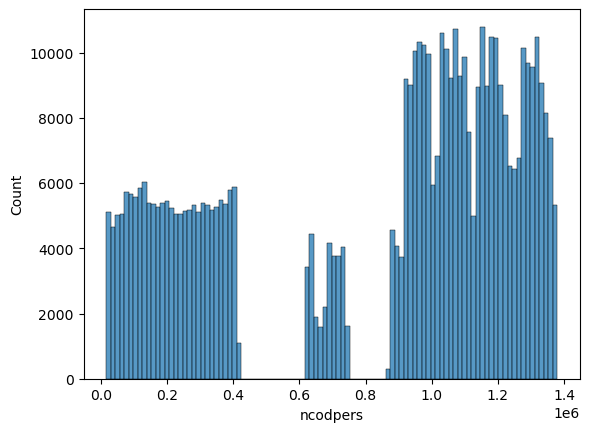

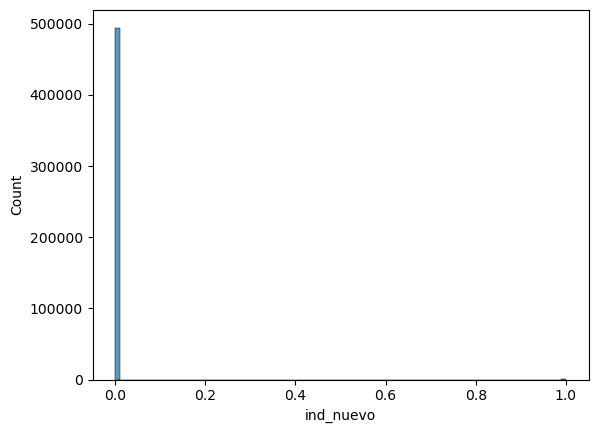

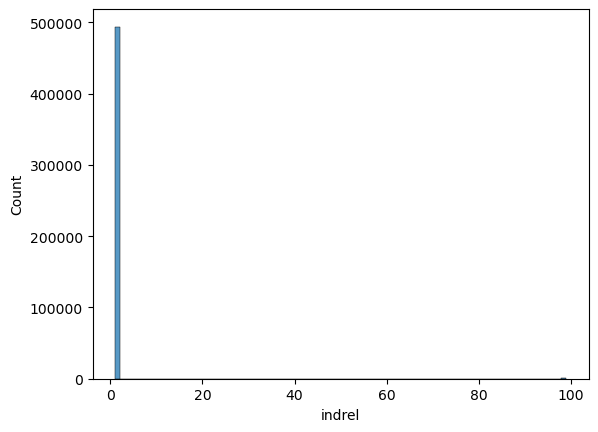

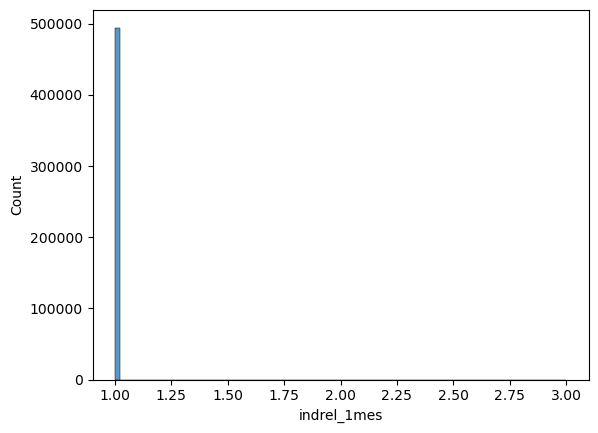

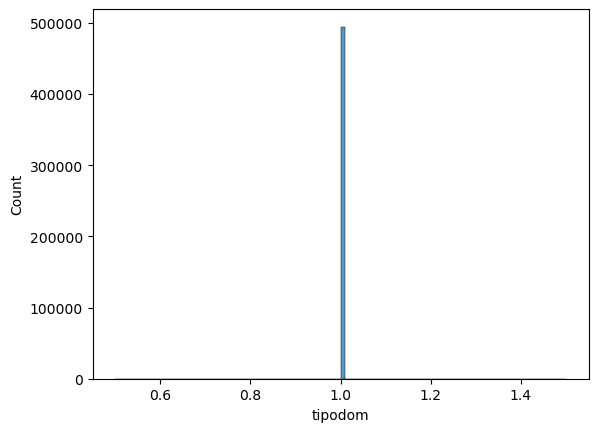

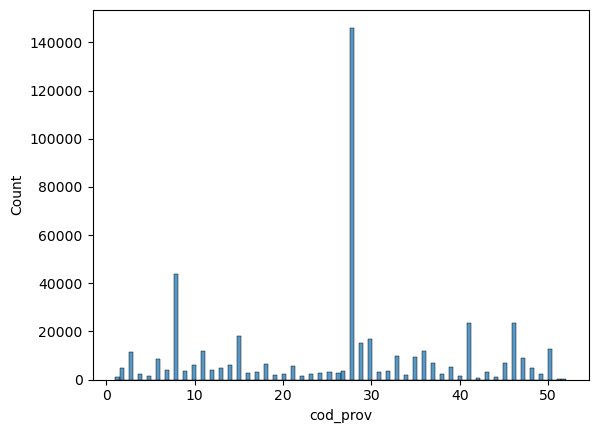

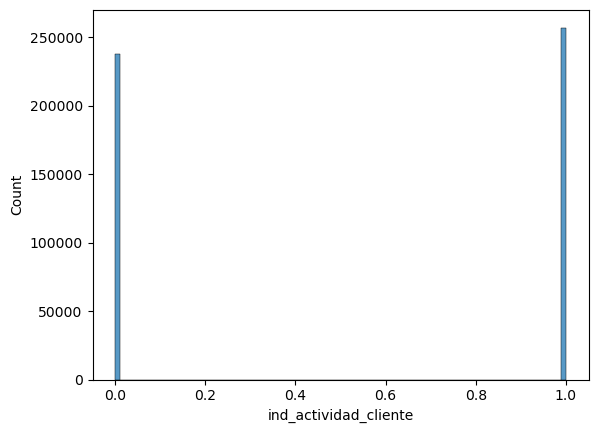

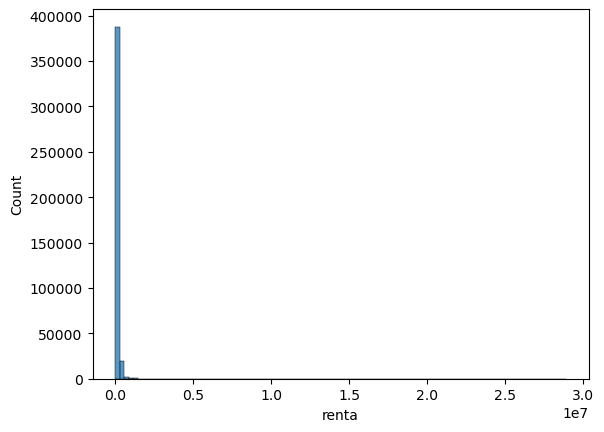

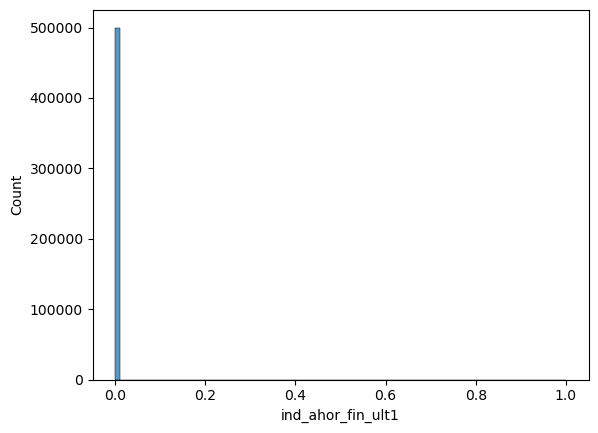

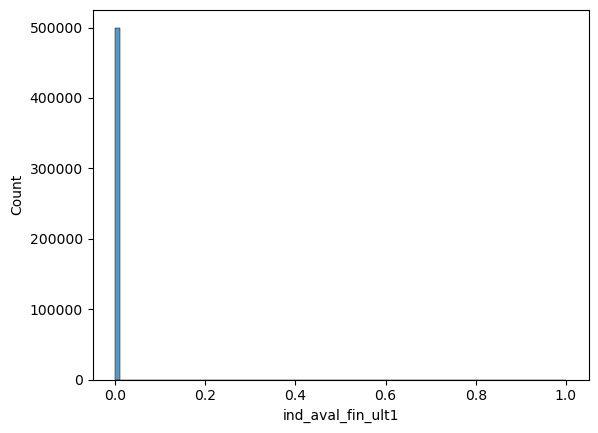

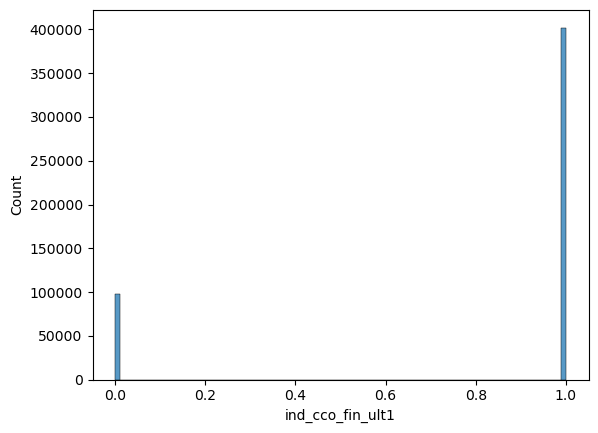

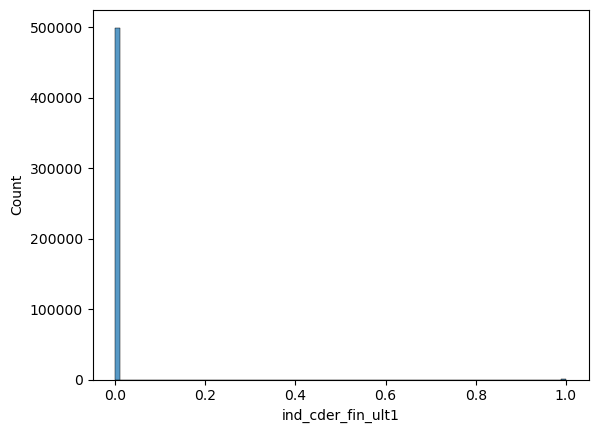

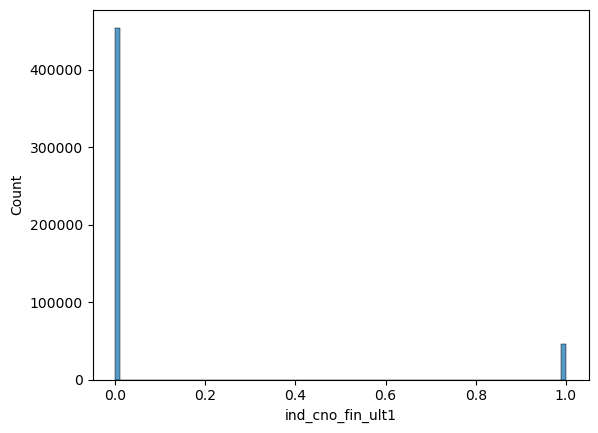

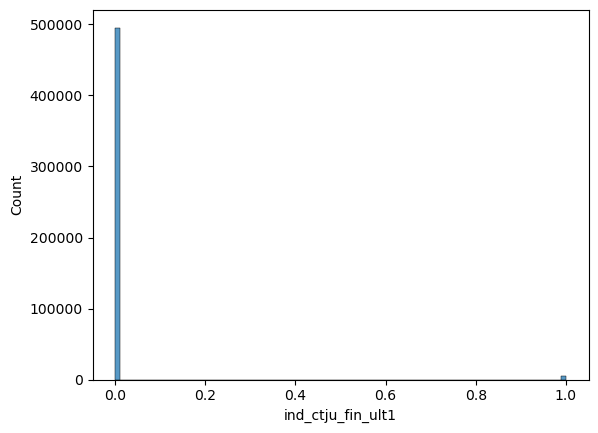

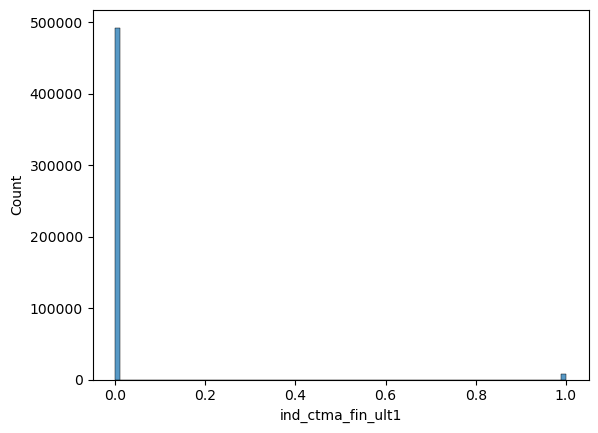

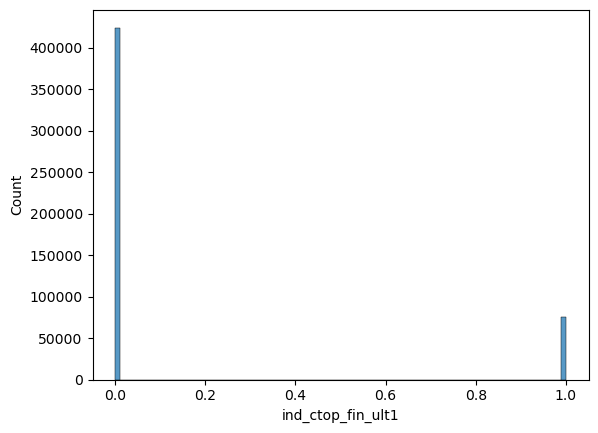

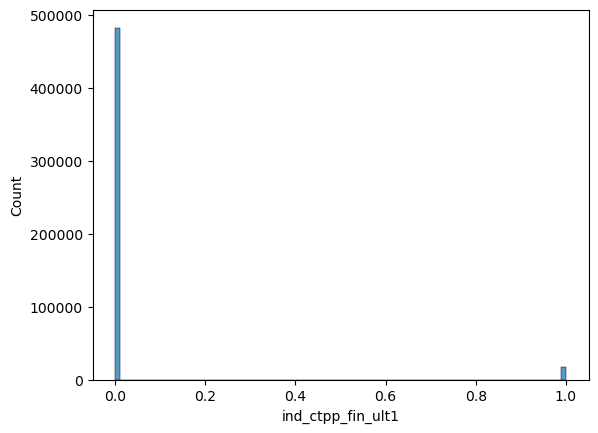

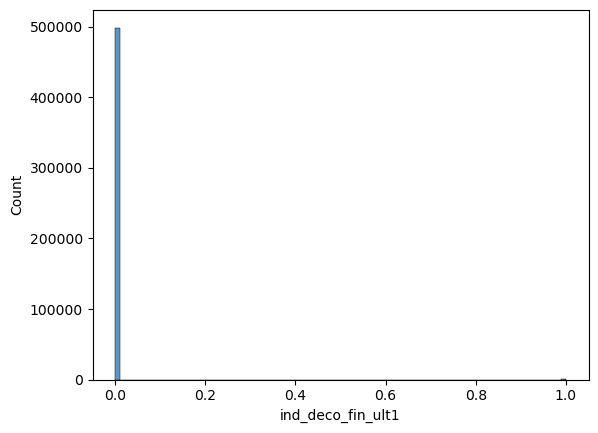

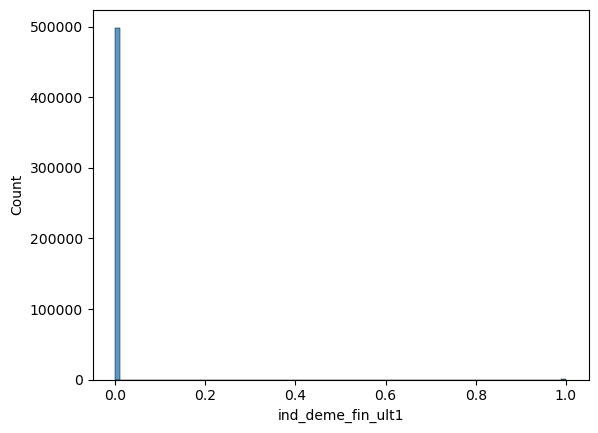

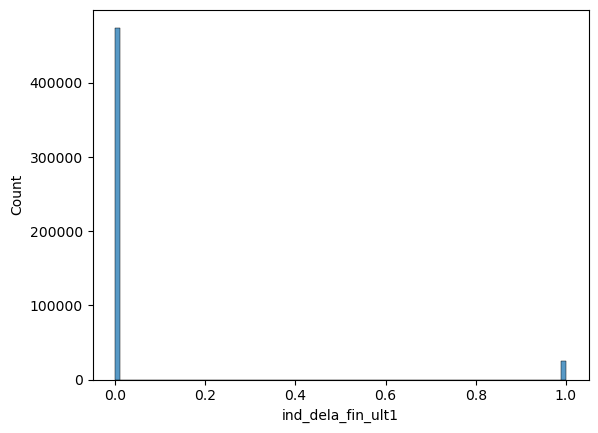

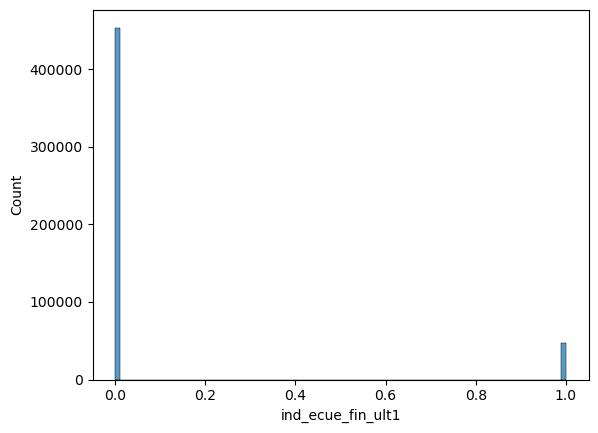

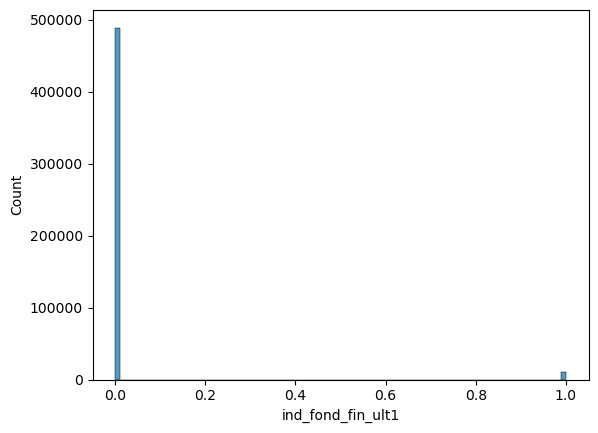

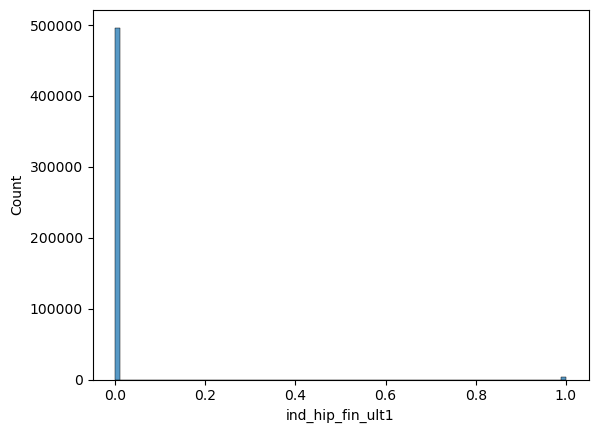

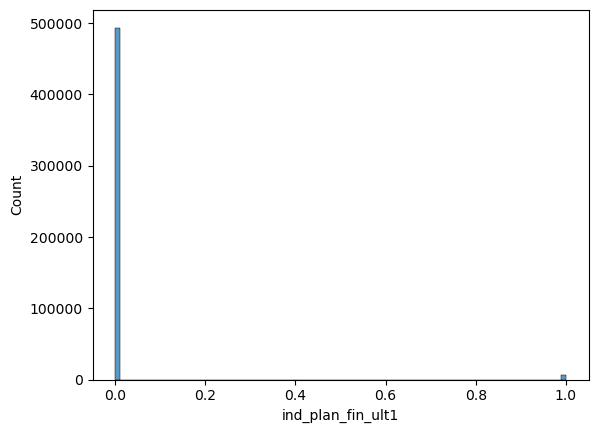

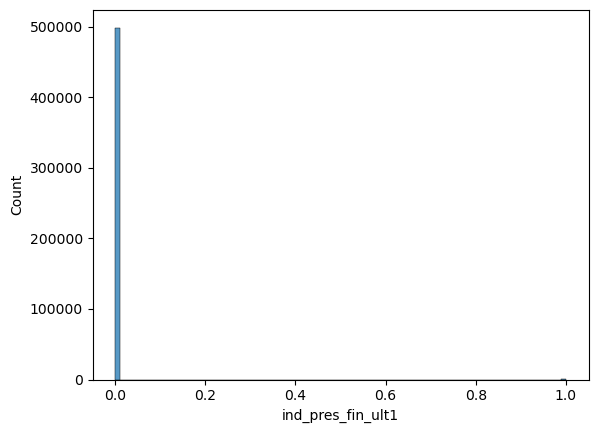

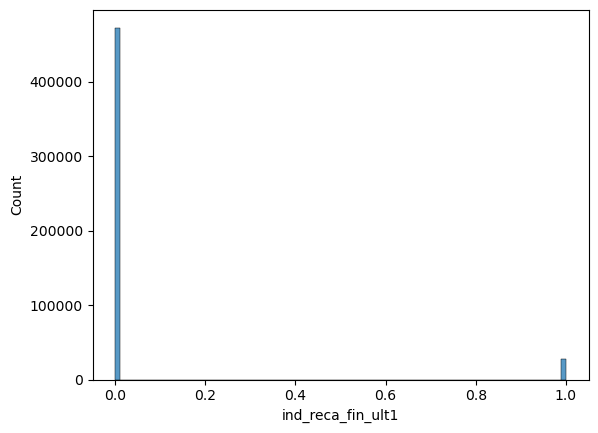

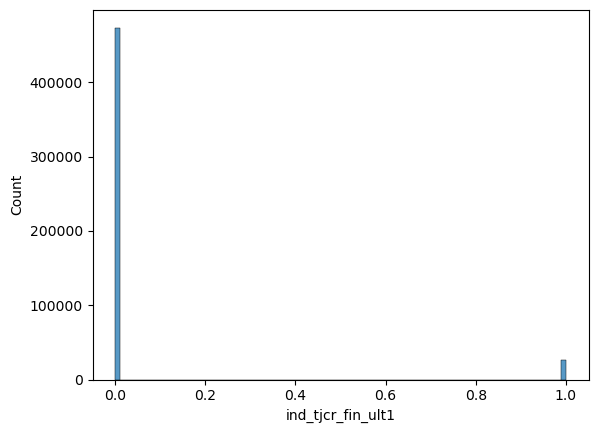

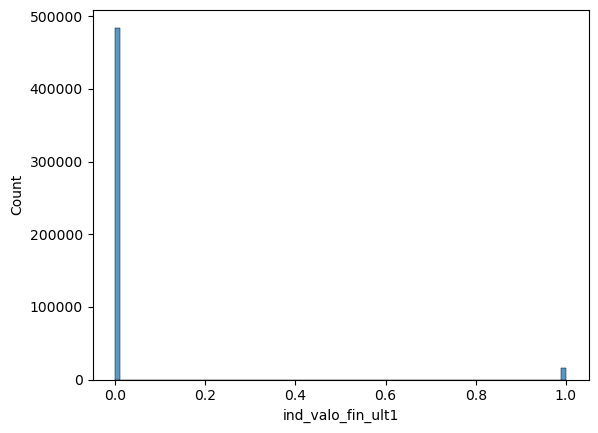

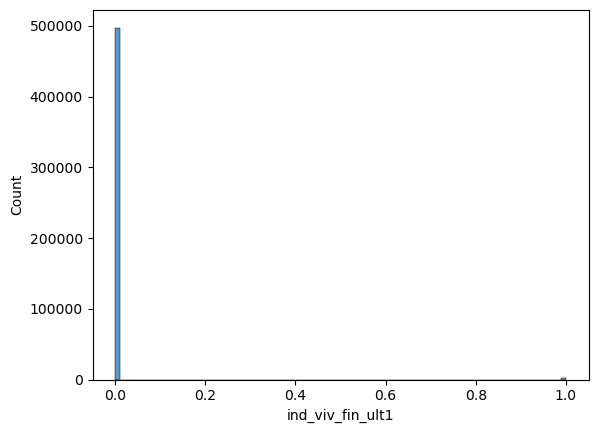

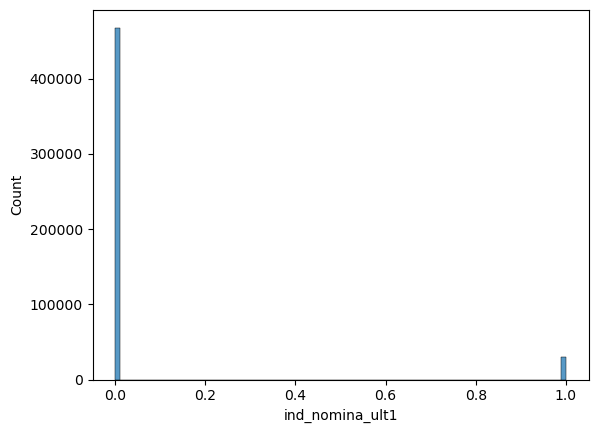

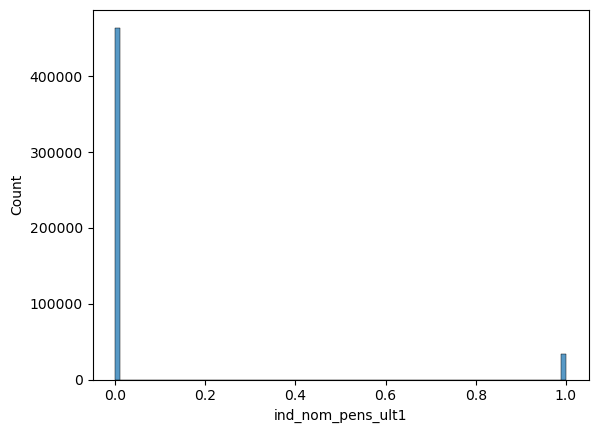

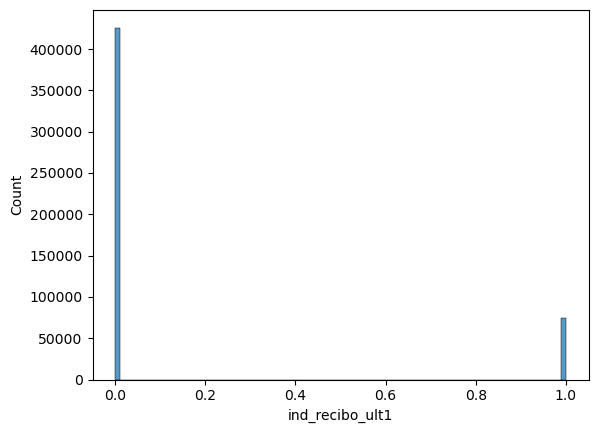

In [9]:
##Data visualization

for i in df.select_dtypes(include = 'number').columns:
    sns.histplot(data = df, x=i, bins = 100)
    plt.show()

In [10]:
##Start cleaning (for simplicty dropping all columns that won't be used for features)

df.drop(columns=["fecha_dato", "ult_fec_cli_1t", "conyuemp", "ncodpers", "pais_residencia", "sexo", "fecha_alta", "antiguedad","indrel","indresi","indext", "canal_entrada", "indfall", "tipodom", "cod_prov", "nomprov", "segmento"], inplace=True)


#Grouping income and age so it is easier to work with the data

age_group = [0, 21, 35, 60, 100]
age_labels = ['Young', 'Adult', 'Senior', 'Elder']

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age_group'] = pd.cut(df['age'], bins=age_group, labels=age_labels)

#Now it's grouped, I can drop it

df.drop(columns=['age'], inplace=True)

In [11]:
percentiles = [0, 25, 50, 75, 100]
income_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']

df['income_group'] = pd.cut(df['renta'], bins=len(percentiles) - 1, labels=income_labels)

df.drop(columns=['renta'], inplace=True)

In [12]:
#Fill missing values

df.fillna(df.median(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True) 

/var/folders/j6/qffj6d9509bfydvp_5l5_yhm0000gn/T/ipykernel_42693/2010405739.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)
/var/folders/j6/qffj6d9509bfydvp_5l5_yhm0000gn/T/ipykernel_42693/2010405739.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.fillna(df.mode().iloc[0], inplace=True)


In [13]:
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()
categorical_columns.extend(['age_group', 'income_group'])

In [14]:
df[categorical_columns]

,ind_empleado,tiprel_1mes,age_group,income_group
0,N,A,Adult,Low
1,N,I,Adult,Low
2,N,I,Adult,Low
3,N,I,Adult,Low
4,N,A,Adult,Low
...,...,...,...,...
499994,N,A,Senior,Low
499995,N,I,Adult,Low
499996,N,I,Adult,Low
499997,N,I,Senior,Low


In [15]:
#One hot encoding

df = pd.get_dummies(df, columns=categorical_columns)

In [16]:
target_variables = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 
                    'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 
                    'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 
                    'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 
                    'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 
                    'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']


In [17]:
X = df.drop(columns=target_variables)
y = df[target_variables]

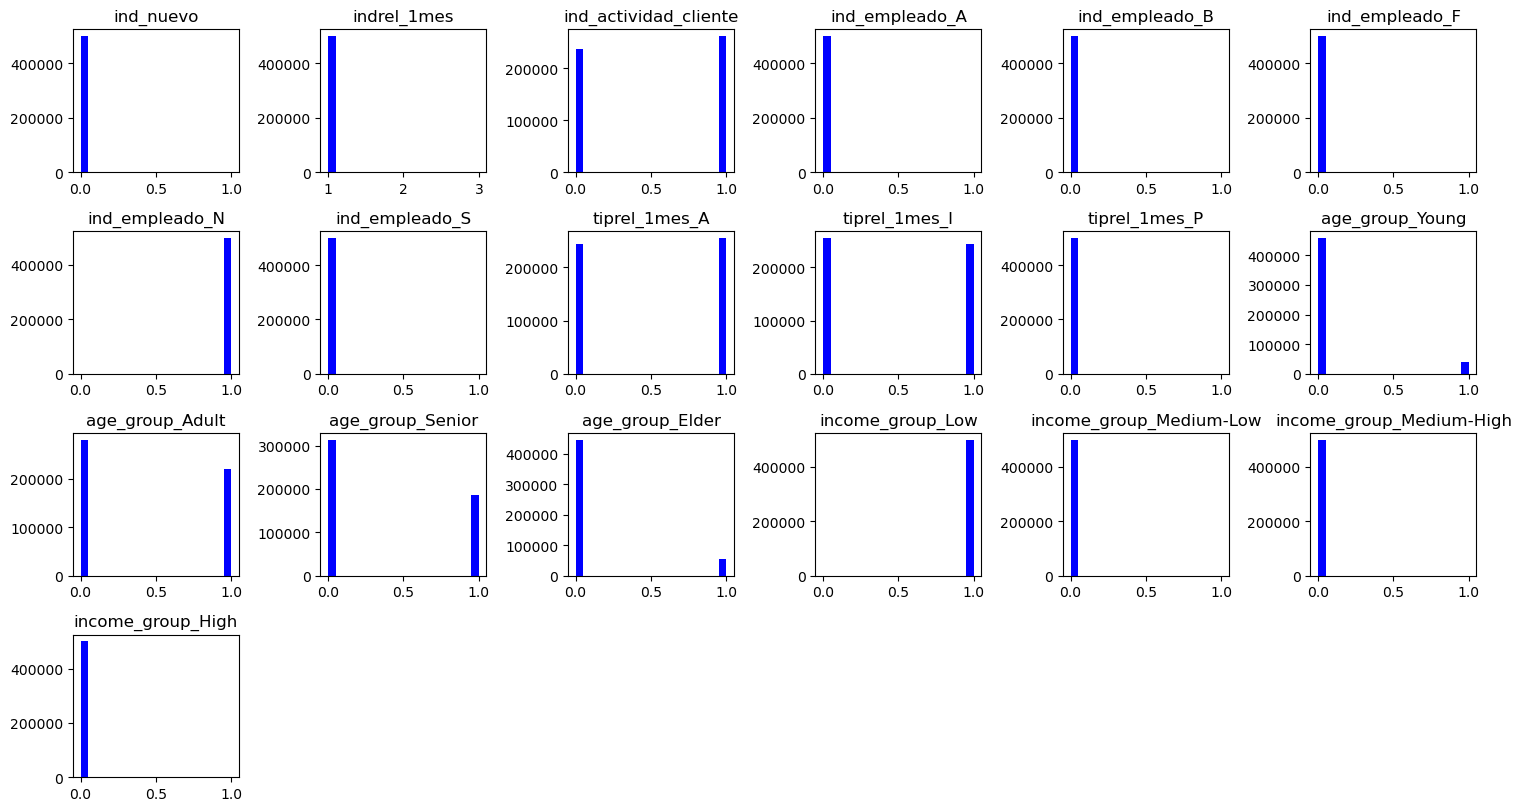

In [18]:
##Histogram for features
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(5, 6, i)
    plt.hist(X[column], bins=20, color='blue')
    plt.title(column)
plt.tight_layout()
plt.show()

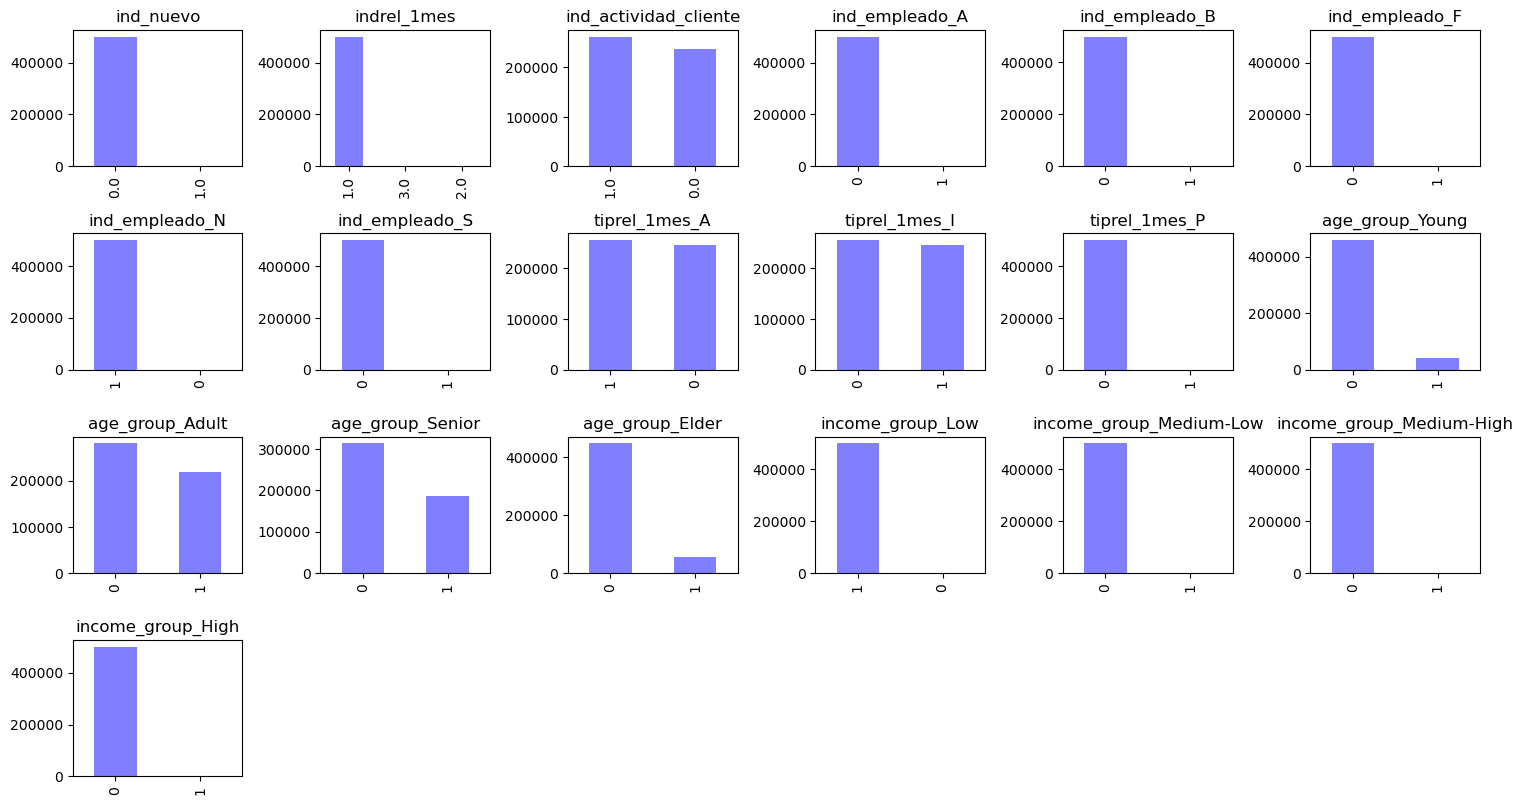

In [20]:
# Barplot for features
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(5, 6, i)
    X[column].value_counts().plot(kind='bar', color='blue', alpha=0.5)
    plt.title(column)
plt.tight_layout()
plt.show()

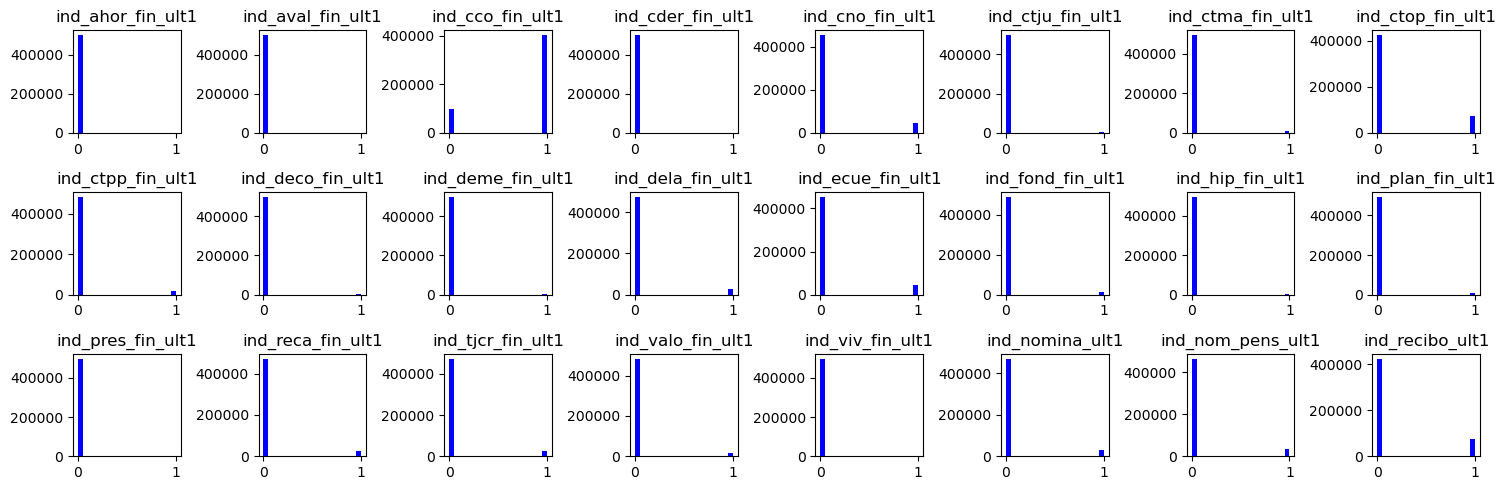

In [50]:
##Histogram for variables
plt.figure(figsize=(15, 5))
for i, column in enumerate(y.columns, 1):
    plt.subplot(3, 8, i)
    plt.hist(y[column], bins=20, color='blue')
    plt.title(column)
plt.tight_layout()
plt.show()

In [63]:
##Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##Intialize classifier with parameters and train
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, verbose=1)
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.7s finished


RandomForestClassifier(n_jobs=-1, verbose=1)

In [64]:
##Making predictions and give score
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,confusion_matrix
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1:', f1_score(y_test, y_pred, average='micro'))
print ('Precision:', precision_score(y_test, y_pred, average='micro'))
print ('Recall:', recall_score(y_test, y_pred, average='micro'))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    6.4s finished


Accuracy:  0.5721939393939394
F1: 0.5912005424966933
Precision: 0.8081165911051559
Recall: 0.46609146728774087


In [72]:
roc_score = roc_auc_score(y_test, y_pred)

print(f'ROC AUC Score: {roc_score}')

ROC AUC Score: 0.5012624253090388


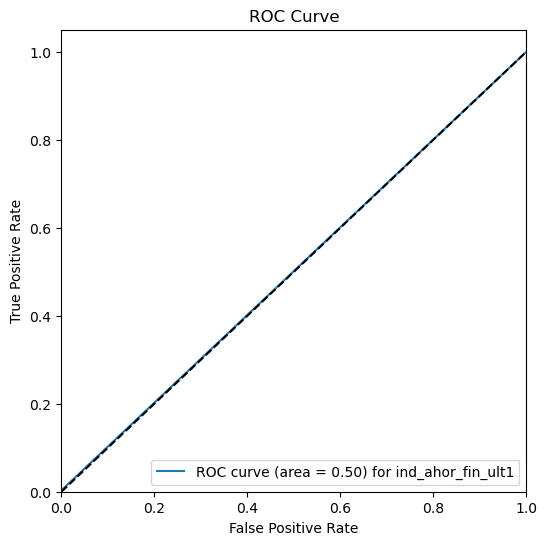

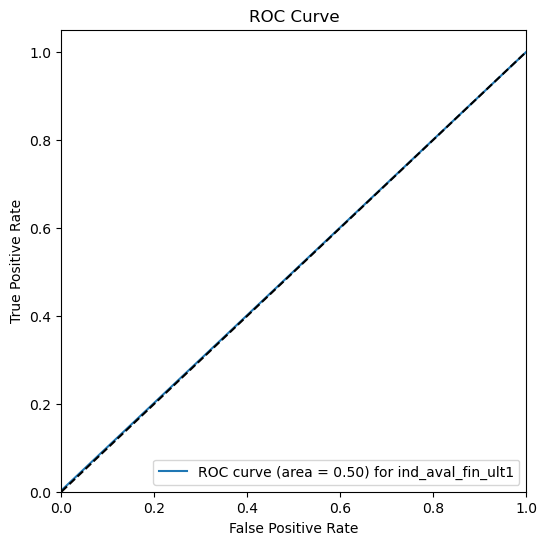

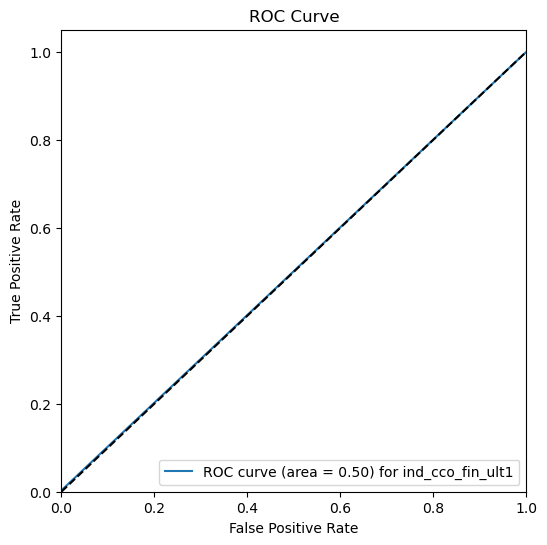

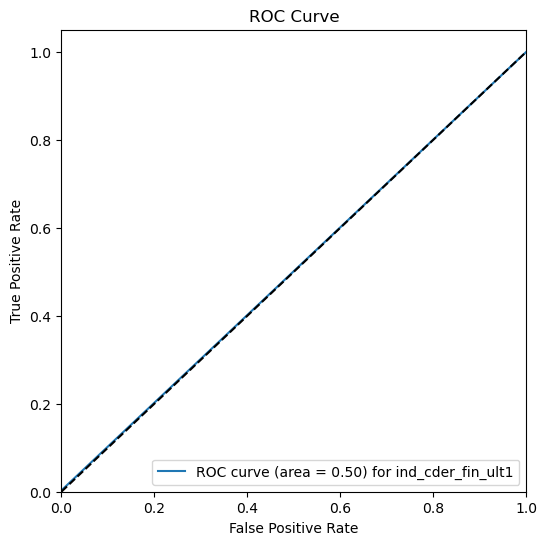

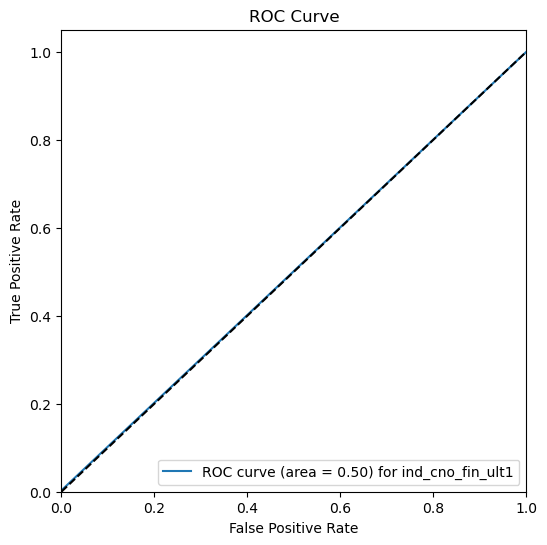

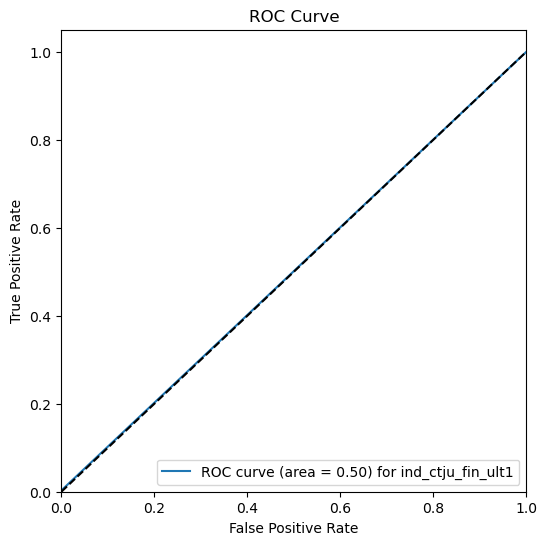

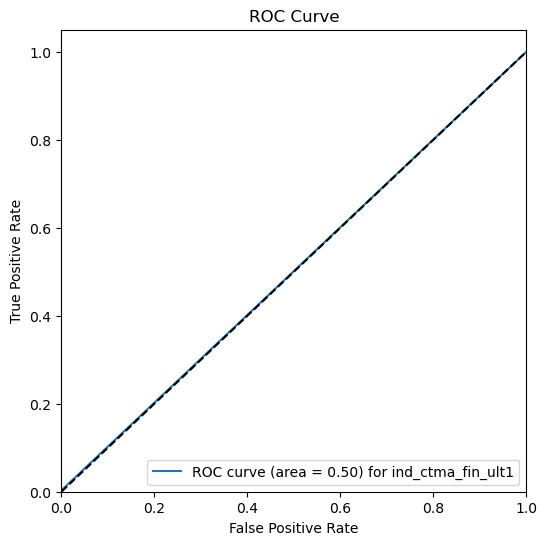

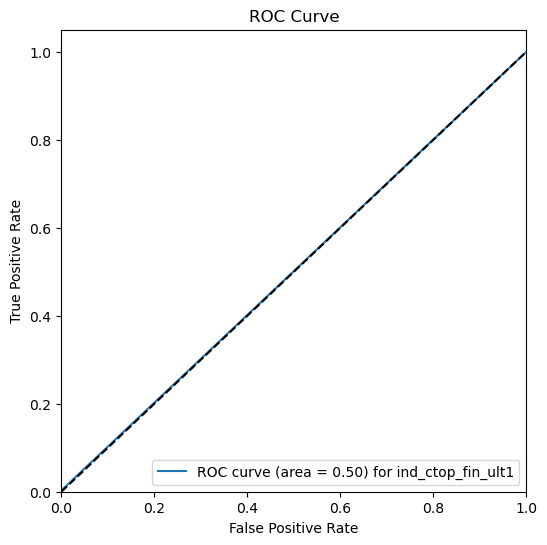

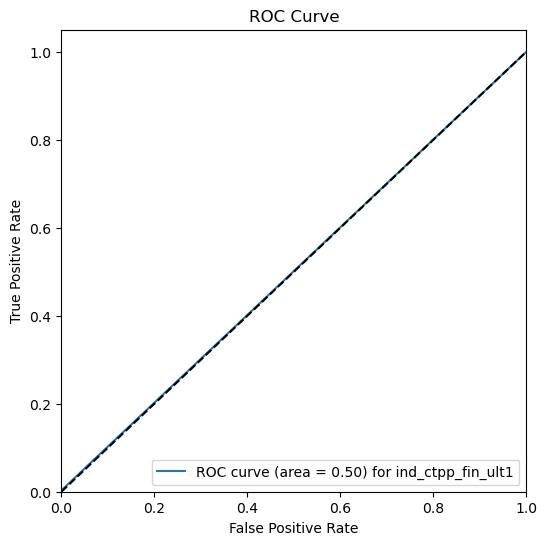

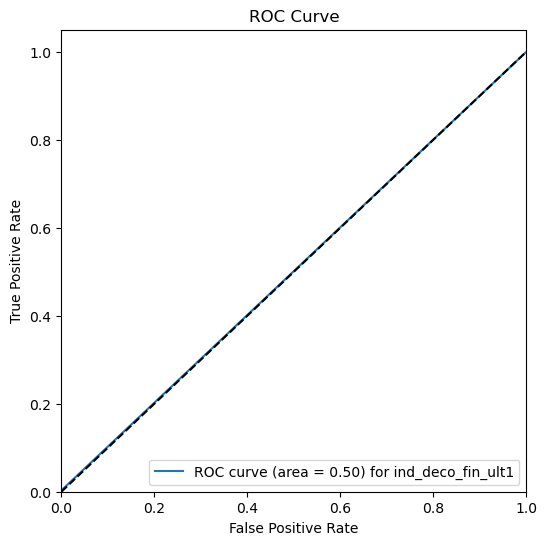

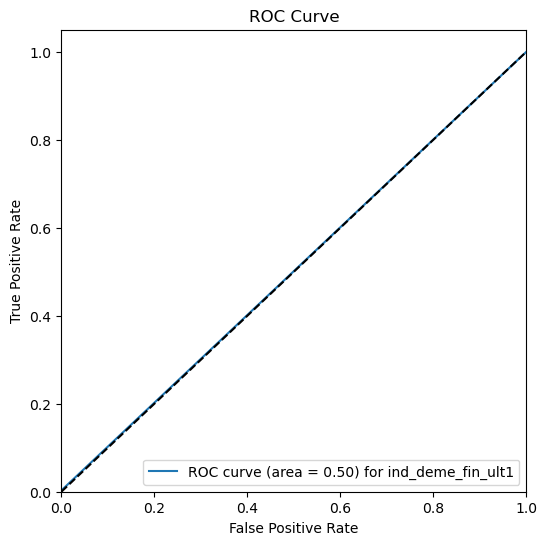

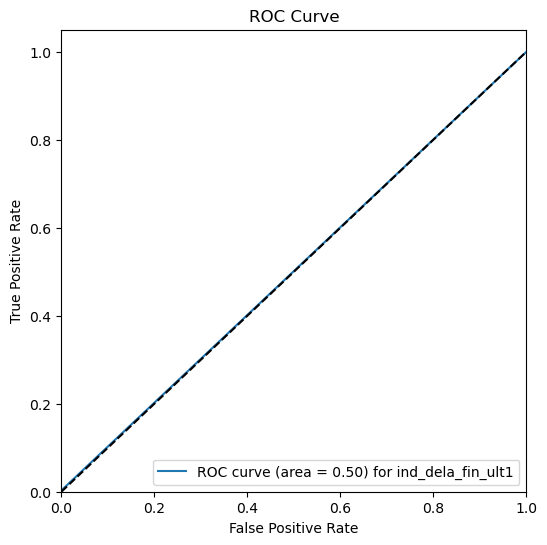

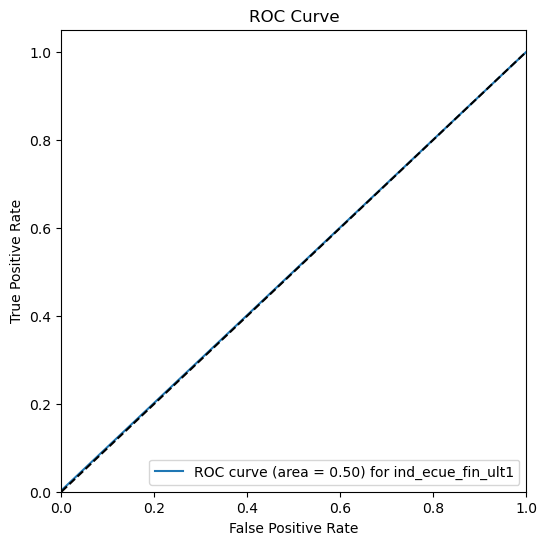

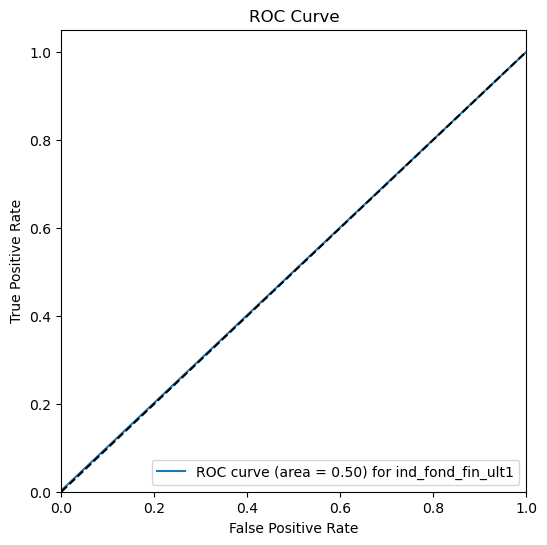

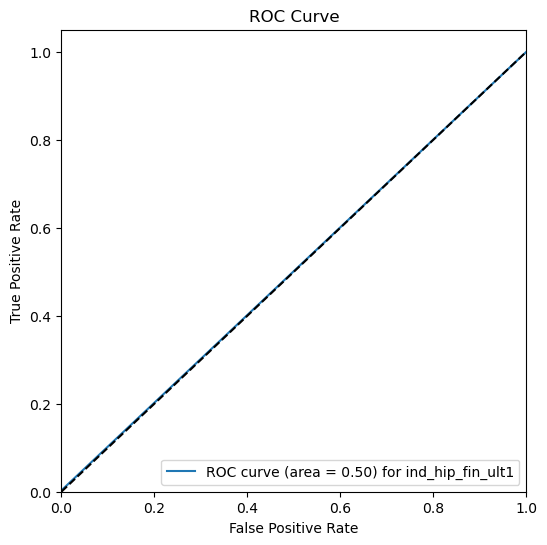

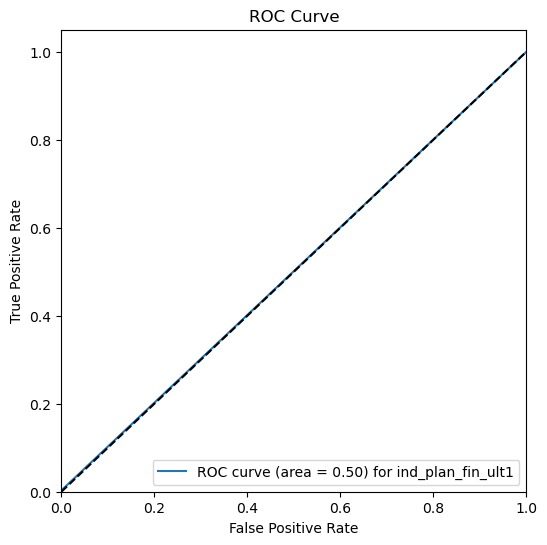

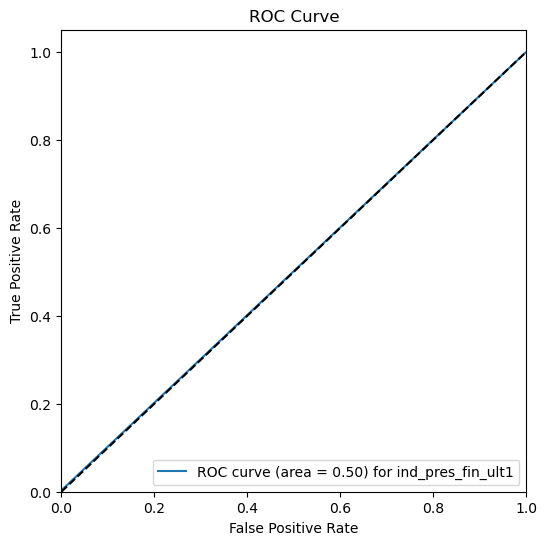

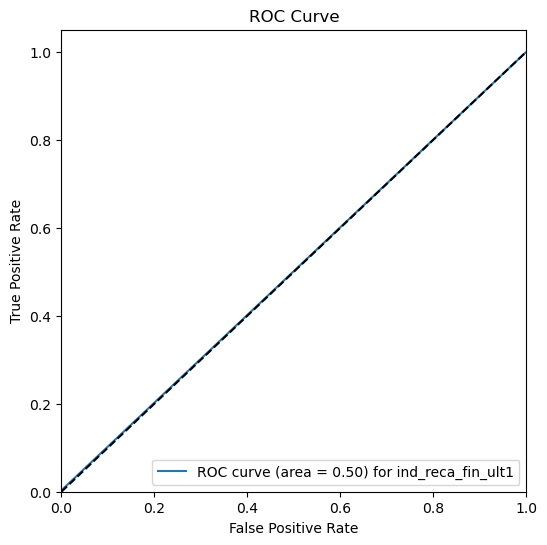

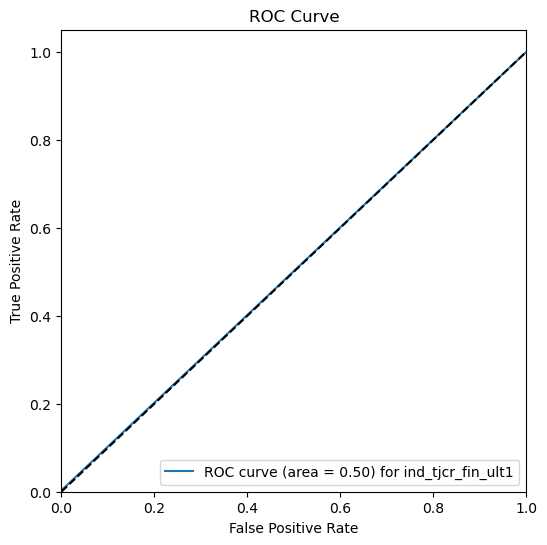

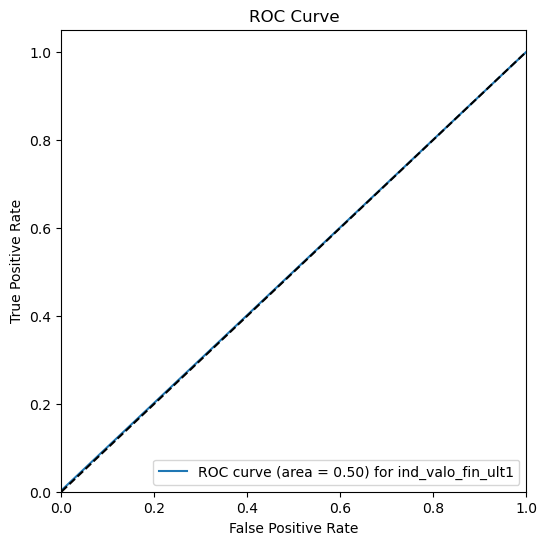

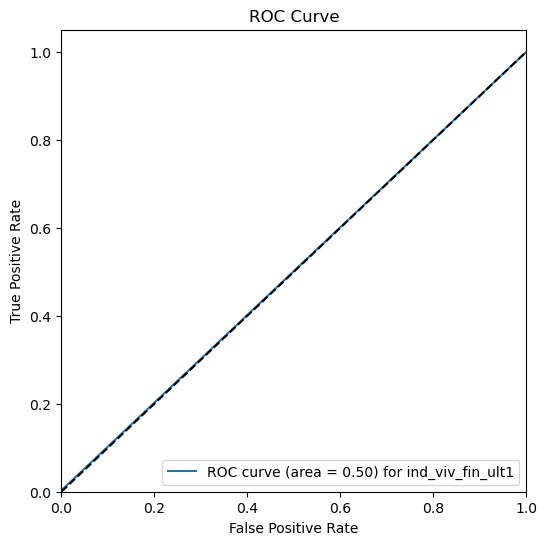

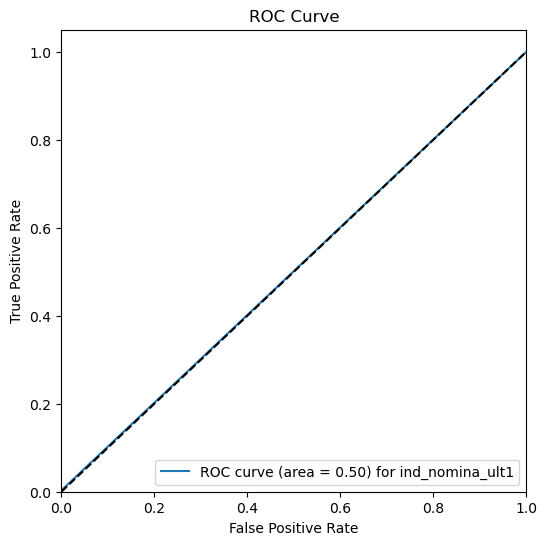

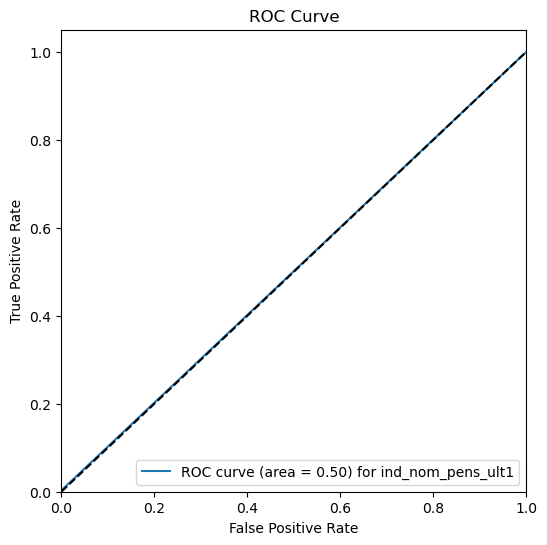

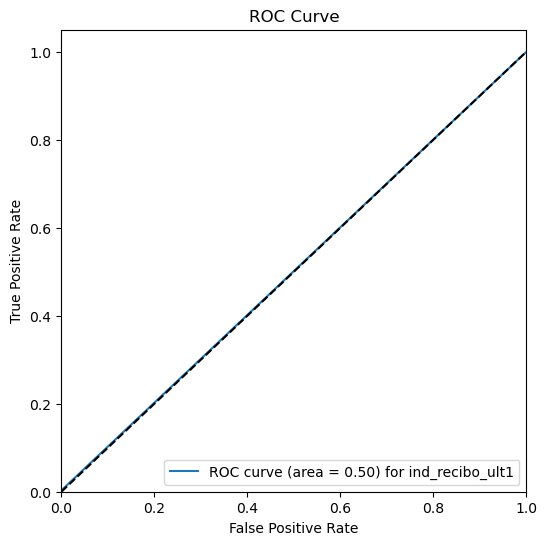

In [71]:
for col in y.columns:
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
    roc_score = auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f) for %s' % (roc_score, col))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()